# Modelos de Regresion Lineal
## Modelo con datos simulados

y = a + b * x

X son 100 valores distribuidos con una N(1.5 , 2.5)

ye = 5 + 1.9* X + e

e estara distribuido segun una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0.8 * np.random.randn(100)

In [7]:
y_pred = 5 + 1.9*x 

In [8]:
y_act = 5 + 1.9*x + res

In [9]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [10]:
data = pd.DataFrame(
    {
    "x" : x_list,
    "y_pred": y_pred_list,
    "y_act": y_act_list
    }
    )

In [11]:
data.head()

,x,y_pred,y_act
0,2.204788,9.189098,8.987986
1,4.492631,13.535998,13.342134
2,2.302394,9.374549,9.174788
3,1.527050,7.901395,8.168204
4,-2.757920,-0.240049,-1.544555


In [19]:
import matplotlib.pyplot as plt

In [20]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+1)]

Text(0.5, 1.0, ' Valores Actuales vs Predicciones')

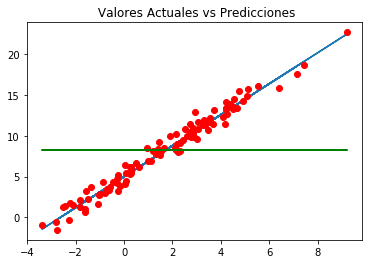

In [22]:
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean, "g")
plt.title(" Valores Actuales vs Predicciones")

In [31]:
data["SSR"] = (data["y_pred"] - np.mean(y_act))**2
data["SSD"] = (data["y_pred"] - data["y_act"])**2
data["SST"] = (data["y_act"] - np.mean(y_act))**2

In [32]:
data.head()

,x,y_pred,y_act,SSR,SSD,SST
0,2.204788,9.189098,8.987986,0.927505,0.040446,0.580582
1,4.492631,13.535998,13.342134,28.195791,0.037583,26.174550
2,2.302394,9.374549,9.174788,1.319103,0.039905,0.900147
3,1.527050,7.901395,8.168204,0.105386,0.071187,0.003344
4,-2.757920,-0.240049,-1.544555,71.674438,1.701736,95.464268


In [33]:
SSR = np.sum(data["SSR"])
SSD = np.sum(data["SSD"])
SST = np.sum(data["SST"])

In [34]:
SSR

2331.504079517368

In [35]:
SSD

63.95825800082453

In [36]:
SST

2405.1326480461175

In [37]:
SSR + SSD

2395.4623375181927

In [38]:
R2 = SSR/SST

In [39]:
R2

0.96938689905999

(array([ 1.,  1.,  7., 10., 14., 16., 24., 10.,  8.,  9.]),
 array([-2.38807376, -2.00262342, -1.61717308, -1.23172275, -0.84627241,
        -0.46082207, -0.07537173,  0.3100786 ,  0.69552894,  1.08097928,
         1.46642961]),
 <a list of 10 Patch objects>)

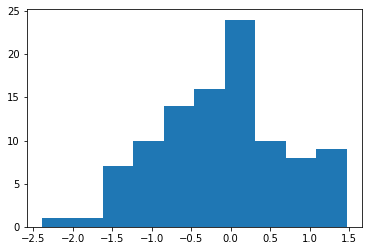

In [40]:
plt.hist(data["y_pred"] - data["y_act"])

## Obteniendo la recta de regresion

In [41]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_act"])
x_mean , y_mean

(1.6410737292381992, 8.22602714126042)

In [43]:
data["beta_n"]=(data["x"]-x_mean)*(data["y_act"]-y_mean)
data["beta_d"]= (data["x"]-x_mean)**2

In [44]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [45]:
alpha = y_mean - beta * x_mean

In [46]:
alpha , beta

(5.099957225496247, 1.9048930344009112)

El modelo lineal obtenido por regresion es y = 5.099957225496247 + 1.9048930344009112 * X

In [47]:
data["y_model"] = alpha + beta * data["x"]

In [49]:
SSR= np.sum((data["y_model"] - y_mean)**2)
SSD= np.sum((data["y_model"] - data["y_act"])**2)
SST= np.sum((data["y_act"] - y_mean)**2)

In [50]:
SSR , SSD , SST

(2342.3559654381643, 62.77668260795272, 2405.1326480461175)

Text(0.5, 1.0, ' Valores Actuales vs Predicciones')

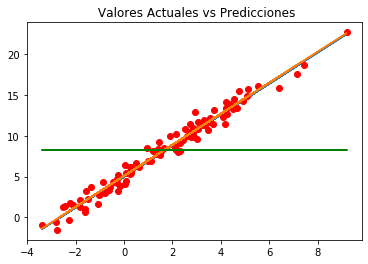

In [53]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+1)]

plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x, data["y_model"])
plt.plot(x,y_mean, "g")
plt.title(" Valores Actuales vs Predicciones")

## Error estandar de los Residuos

In [55]:
RSE = np.sqrt(SSD/(len(data)-2))

In [57]:
np.mean(data["y_act"])

8.22602714126042

In [58]:
RSE/np.mean(data["y_act"])

0.09729622828155897